In [1]:
import numpy as np
import Feature_Engineering
import metrics
import train_test_split as tts
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine  
from network import NeuralNetworkClassifier
from network import neuralnetwork

### Titanic

In [2]:
file = './train.csv'
X_train, y_train = Feature_Engineering.datatransform(file)
X_train, y_train, X_test, y_test = tts.holdout(X_train, y_train)
Y_train = y_train.reshape((-1,1))
Y_test = y_test.reshape((-1,1))

### Wine

In [3]:
from sklearn import datasets

wines = datasets.load_wine()
X_train, y_train = wines.data, wines.target
X_train, y_train, X_test, y_test = tts.holdout(X_train, y_train)
def transformy(y):
    Y = np.zeros((len(y),max(y)+1))
    for i in range(len(y)):
        if y[i]==0:
            Y[i][0] = 1
        if y[i]==1:
            Y[i][1] = 1
        if y[i]==2:
            Y[i][2] = 1
    return Y
Y_train, Y_test = transformy(y_train), transformy(y_test)
for i in range(X_train.shape[1]):
    X_train[:,i] = (X_train[:,i] - np.mean(X_train[:,i])) / np.std(X_train[:,i])
for i in range(X_test.shape[1]):
    X_test[:,i] = (X_test[:,i] - np.mean(X_test[:,i])) / np.std(X_test[:,i])

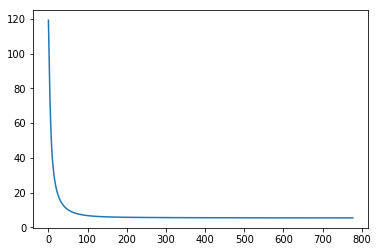

CPU times: user 3.66 s, sys: 4.05 ms, total: 3.66 s
Wall time: 3.66 s


In [14]:
%%time
nnc = NeuralNetworkClassifier(network=neuralnetwork, X_train=X_train, Y_train=Y_train, layer_num=3, hidlayer_nodenum=3)
nnc.fit()

In [15]:
nnc.score(X_test,Y_test)

0.9753086419753086